# Edge Betweenness Centrality Computational Complexity

Algorithmic Complexity: `O(nm + n² log n)`

- [NetworkX Edge Betweenness Centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#rc3df3f41cd0d-1)

- A Faster Algorithm for Betweenness Centrality. Ulrik Brandes, Journal of Mathematical Sociology 25(2):163-177, 2001. https://doi.org/10.1080/0022250X.2001.9990249



In [13]:
import os
import glob
import pickle
import math
import re

import matplotlib.pyplot as plt

import networkx as nx

In [3]:
osmnx_pkl_files = glob.glob('../census_tracts/**/osmnx.pkl', recursive=True)

tract_level_stats = []

for p in osmnx_pkl_files:
   with open(p, 'rb') as f:
    dir = os.path.dirname(os.path.dirname(p))

    geoid = re.search('census-tract-([0-9]{11})', dir).group(1)

    g = pickle.load(f) 

    n = len(g.nodes())
    m = len(g.edges())

    algo_time = round(n*m + (n*n * math.log(n)))

    gpkg_file_path = os.path.join(dir, 'network.gpkg')

    osmnx_pkl_last_mod_time = os.path.getmtime(p)
    gpkg_last_mod_time = os.path.getmtime(gpkg_file_path)

    metric_compute_time_sec = gpkg_last_mod_time - osmnx_pkl_last_mod_time

    d = { 'geoid': geoid, 'nodes': n, 'edges': m, 'algo_time': algo_time, 'compute_time': metric_compute_time_sec }

    tract_level_stats.append(d)

print('tracts:', len(tract_level_stats))


tracts: 323


In [9]:
osmnx_pkl_files = glob.glob('../county_subdivisions//**/osmnx.pkl', recursive=True)

county_subdivision_level_stats = []

for p in osmnx_pkl_files:
   with open(p, 'rb') as f:
    dir = os.path.dirname(os.path.dirname(p))

    geoid = re.search('county-subdivision-([0-9]{10})', dir).group(1)
    # print(geoid)

    g = pickle.load(f) 

    n = len(g.nodes())
    m = len(g.edges())

    algo_time = round(n*m + (n*n * math.log(n)))

    gpkg_file_path = os.path.join(dir, 'network.gpkg')

    osmnx_pkl_last_mod_time = os.path.getmtime(p)
    gpkg_last_mod_time = os.path.getmtime(gpkg_file_path)

    metric_compute_time_sec = gpkg_last_mod_time - osmnx_pkl_last_mod_time

    d = { 'geoid': geoid, 'nodes': n, 'edges': m, 'algo_time': algo_time, 'compute_time': metric_compute_time_sec }

    county_subdivision_level_stats.append(d)

print('count_subdivisions:', len(county_subdivision_level_stats))



count_subdivisions: 117


In [10]:
osmnx_pkl_files = glob.glob('../counties/**/osmnx.pkl', recursive=True)

county_level_stats = []

for p in osmnx_pkl_files:
   with open(p, 'rb') as f:
    dir = os.path.dirname(os.path.dirname(p))

    geoid = re.search('county-([0-9]{5})', dir).group(1)
    # print(geoid)

    g = pickle.load(f) 

    n = len(g.nodes())
    m = len(g.edges())

    algo_time = round(n*m + (n*n * math.log(n)))

    gpkg_file_path = os.path.join(dir, 'network.gpkg')

    osmnx_pkl_last_mod_time = os.path.getmtime(p)
    gpkg_last_mod_time = os.path.getmtime(gpkg_file_path)

    metric_compute_time_sec = gpkg_last_mod_time - osmnx_pkl_last_mod_time

    d = { 'geoid': geoid, 'nodes': n, 'edges': m, 'algo_time': algo_time, 'compute_time': metric_compute_time_sec }

    county_level_stats.append(d)

print('counties:', len(county_level_stats))



counties: 57


497


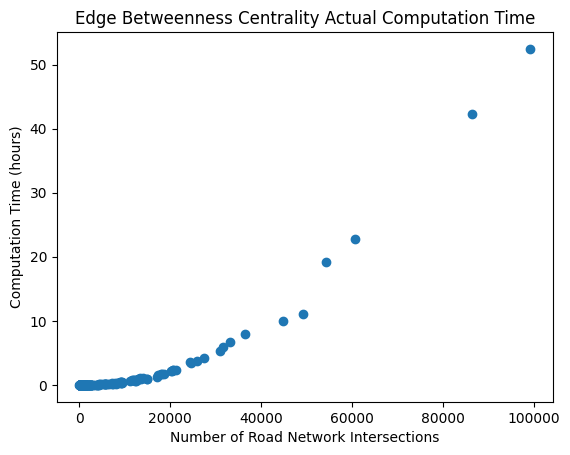

In [32]:
stats = tract_level_stats + county_subdivision_level_stats + county_level_stats
print(len(stats))

x = [d['nodes'] for d in stats]
y = [d['compute_time'] / 60 / 60 for d in stats]

plt.scatter(x,y, label='Actual Time')

plt.title('Edge Betweenness Centrality Actual Computation Time')
plt.xlabel('Number of Road Network Intersections')
plt.ylabel('Computation Time (hours)')

plt.show()

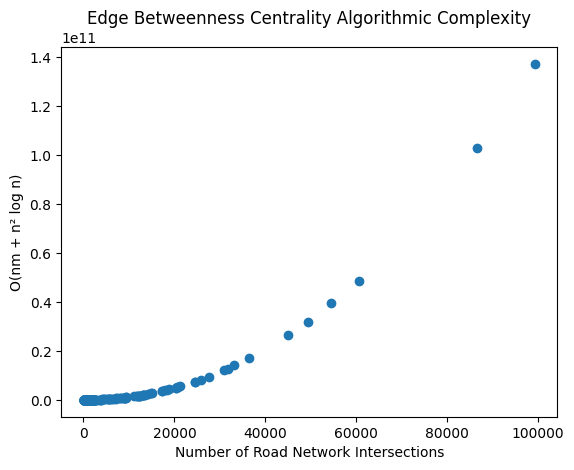

In [31]:
x = [d['nodes'] for d in stats]
z = [d['algo_time'] for d in stats]

plt.scatter(x,z, label='O(nm + n² log n)')

plt.title('Edge Betweenness Centrality Algorithmic Complexity')
plt.xlabel('Number of Road Network Intersections')
plt.ylabel('O(nm + n² log n)')

plt.show()
